<a href="https://colab.research.google.com/github/WambuiMunene/Tensorflow-Notebooks/blob/main/TF2_Linear_Regression_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# get imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-02-27 14:30:06--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-02-27 14:30:06 (25.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [4]:
# Load the daat
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1,1) # Making an N x D matrix
y = data[:,1]


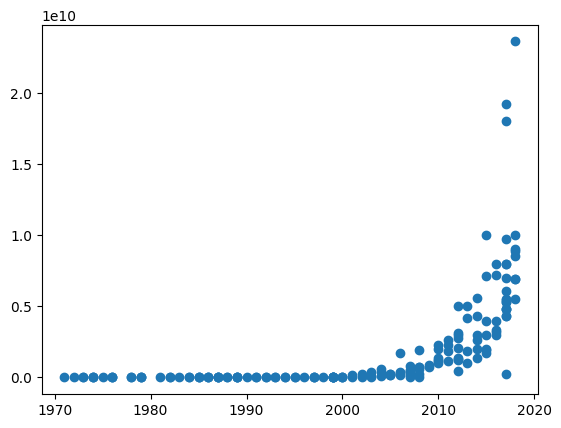

In [7]:
# plot the data
plt.scatter(X,y);

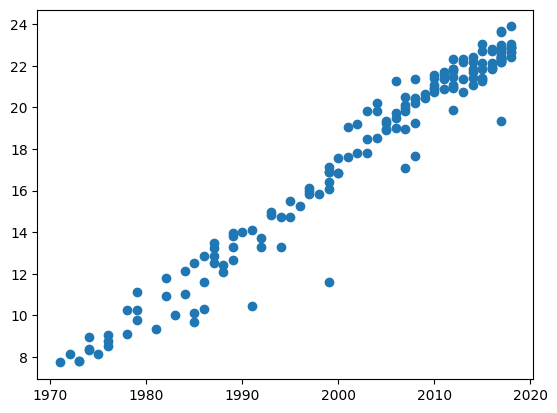

In [8]:
y = np.log(y)
plt.scatter(X,y);

In [9]:
X = X -X.mean()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),

])

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9),   # because we did not standardize the data. if we had, we could just use 'adam'
    loss = 'MSE'

)

In [12]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


In [13]:
r = model.fit(X, y, epochs=200, callbacks =[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 327.2210 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 291.7293 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 244.2241 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 199.7925 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.0976 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.1210 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133.5180 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.4266 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 70.7094 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.2755 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.6639 - learning_rate: 0.0010
Epoch 12

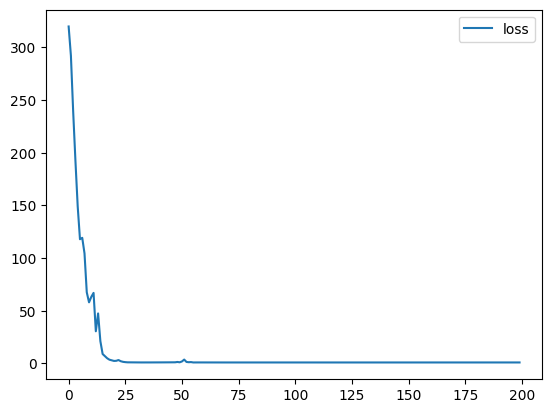

In [14]:
# plot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [15]:
model.layers

[<Dense name=dense, built=True>]

In [16]:
model.layers[0].get_weights()

[array([[0.35035753]], dtype=float32), array([17.756245], dtype=float32)]

In [17]:
a = model.layers[0].get_weights()[0][0,0]
a

0.35035753

# **Making Predictions**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


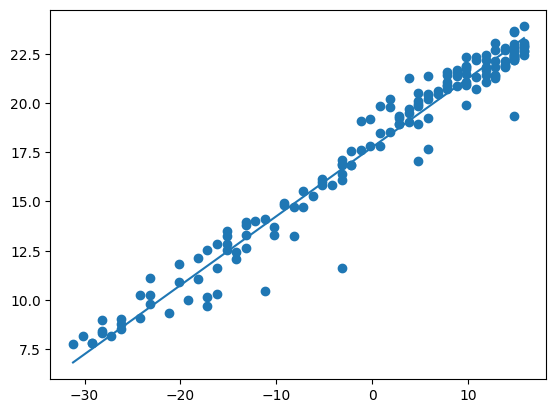

In [18]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X,y)
plt.plot(X, Yhat)